In [23]:
import os
import pandas
import wikipedia
langsdict = wikipedia.languages()

# 1: Download raw wikipedia XML files
The script downloads these automatically, they come in a compressed .xml.bz format.

In [25]:
dumpspath = './datagather/dumps/'
dumpsraw = dict()
for f in os.listdir(dumpspath):
    if f.startswith('.'): continue
    lang = f[:f.index('.')-4]
    dumpsraw[lang] = [langsdict[lang], os.path.getsize(dumpspath + f)]

In [50]:
dumps = pandas.DataFrame.from_dict(dumpsraw, columns=['name', 'fsize'], orient='index')
dumps.head()

,name,fsize
ht,Kreyòl ayisyen,13973117
li,Limburgs,14315808
ig,Igbo,2109360
tet,tetun,1222946
wuu,吴语,14397542


In [45]:
excluded = [langsdict[l] for l in langsdict.keys() if l not in dumps.index]
print(len(excluded), 'languages excluded:\n', ', '.join(excluded))

208 languages excluded:
 Qafár af, bahasa ambon, адыгабзэ, адыгабзэ, تونسي/Tûnsî, تونسي, Tûnsî, Akan, Gegë, алтай тил, Pangcah, अङ्गिका, ܐܪܡܝܐ, mapudungun, جازايرية, American sign language, Atikamekw, ᬩᬲᬩᬮᬶ, žemaitėška, Batak Toba, Batak Toba, جهلسری بلوچی, беларуская (тарашкевіца)‎, беларуская (тарашкевіца)‎, روچ کپتین بلوچی, भोजपुरी, Bislama, bamanankan, بختیاری, Bráhuí, Batak Mandailing, Iriga Bicolano, Chavacano de Zamboanga, Chamoru, Choctaw, ᏣᎳᎩ, Tsetsêhestâhese, Capiceño, Nēhiyawēwin / ᓀᐦᐃᔭᐍᐏᐣ, къырымтатарджа (Кирилл)‎, qırımtatarca (Latin)‎, словѣньскъ / ⰔⰎⰑⰂⰡⰐⰠⰔⰍⰟ, Österreichisches Deutsch, Schweizer Hochdeutsch, Deutsch (Sie-Form)‎, Thuɔŋjäŋ, Dusun Bundu-liwan, ཇོང་ཁ, eʋegbe, Emiliàn, Canadian English, British English, español de América Latina, español (formal)‎, Fulfulde, meänkieli, võro, Na Vosa Vakaviti, français cadien, 赣语（简体）‎, 贛語（繁體）‎, kriyòl gwiyannen, गोंयची कोंकणी, Gõychi Konknni, 𐌲𐌿𐍄𐌹𐍃𐌺, Ἀρχαία ἑλληνικὴ, Alemannisch, Hawaiʻi, Fiji Hindi, Ilonggo, Hiri Motu, Hunsrik

In [49]:
print(dumps.shape[0], 'languages included:\n', ', '.join(dumps['name']))

246 languages included:
 Kreyòl ayisyen, Limburgs, Igbo, tetun, 吴语, коми, الدارجة, latviešu, la .lojban., भोजपुरी, мокшень, Zeêuws, oʻzbekcha/ўзбекча, تۆرکجه, සිංහල, norsk nynorsk, português, Bahasa Melayu, अवधी, 中文, тыва дыл, svenska, башҡортса, മലയാളം, Tagalog, arpetan, slovenščina, Afrikaans, Jawa, Yorùbá, Mirandés, ગુજરાતી, Frysk, Māori, Xitsonga, sicilianu, italiano, Aymar aru, Gagauz, davvisámegiella, føroyskt, తెలుగు, brezhoneg, català, Адыгэбзэ, dansk, 贛語, Pälzisch, Nāhuatl, Novial, qırımtatarca, Simple English, dolnoserbski, Oromoo, অসমীয়া, English, lumbaart, বাংলা, پنجابی, hrvatski, Nouormand, ລາວ, ଓଡ଼ିଆ, русский, 한국어, interlingua, Papiamentu, къарачай-малкъар, Кыргызча, Kotava, български, azərbaycanca, vepsän kel’, Alemannisch, Gaelg, Plattdüütsch, livvinkarjala, Soomaaliga, Piemontèis, Sunda, Ænglisc, galego, Hausa, Mìng-dĕ̤ng-ngṳ̄, کوردی, ייִדיש, emiliàn e rumagnòl, ਪੰਜਾਬੀ, авар, walon, română, Picard, kurdî, گیلکی, مصرى, suomi, မြန်မာဘာသာ, kaszëbsczi, Bahasa Indonesia, ၽ

In [37]:
dumps.sort_values('fsize', ascending=False).head(10) # largest wikis included

,name,fsize
en,English,18267134864
de,Deutsch,5877797639
fr,français,4972442407
ru,русский,4224935955
ja,日本語,3309015603
es,español,3144443923
it,italiano,3129866871
zh,中文,2122775813
pl,polski,2024669975
pt,português,1831289660


In [38]:
dumps.sort_values('fsize').head(10) # smallest wikis included

,name,fsize
jbo,la .lojban.,1074932
pdc,Deitsch,1085523
nov,Novial,1111229
mdf,мокшень,1119182
smn,anarâškielâ,1149766
lbe,лакку,1188547
tet,tetun,1222946
kbp,Kabɩyɛ,1316060
tpi,Tok Pisin,1371967
kaa,Qaraqalpaqsha,1386783


<AxesSubplot:ylabel='Frequency'>

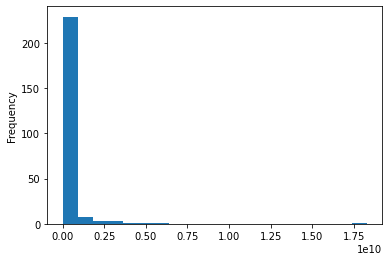

In [32]:
dumps['fsize'].plot.hist(bins=20) # many small wikis, just a few big wikis

In [53]:
f = open('./datagather/kaa-raw.xml', 'r')
exdump = f.readlines()
f.close()
exdump[:20]

['<mediawiki xmlns="http://www.mediawiki.org/xml/export-0.10/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.mediawiki.org/xml/export-0.10/ http://www.mediawiki.org/xml/export-0.10.xsd" version="0.10" xml:lang="kaa">\n',
 '  <siteinfo>\n',
 '    <sitename>Wikipedia</sitename>\n',
 '    <dbname>kaawiki</dbname>\n',
 '    <base>https://kaa.wikipedia.org/wiki/Bas_bet</base>\n',
 '    <generator>MediaWiki 1.36.0-wmf.31</generator>\n',
 '    <case>first-letter</case>\n',
 '    <namespaces>\n',
 '      <namespace key="-2" case="first-letter">Media</namespace>\n',
 '      <namespace key="-1" case="first-letter">Arnawlı</namespace>\n',
 '      <namespace key="0" case="first-letter" />\n',
 '      <namespace key="1" case="first-letter">Sa\'wbet</namespace>\n',
 '      <namespace key="2" case="first-letter">Paydalanıwshı</namespace>\n',
 '      <namespace key="3" case="first-letter">Paydalanıwshı sa\'wbeti</namespace>\n',
 '      <namespace key="4" case="fi

In [54]:
exdump[3745:3765]

['      <sha1>j4b51cvuaoqrzh27274l7fzp3q29453</sha1>\n',
 '    </revision>\n',
 '  </page>\n',
 '  <page>\n',
 "    <title>A'jiniyaz</title>\n",
 '    <ns>0</ns>\n',
 '    <id>152</id>\n',
 '    <revision>\n',
 '      <id>43321</id>\n',
 '      <parentid>30626</parentid>\n',
 '      <timestamp>2020-05-01T08:16:04Z</timestamp>\n',
 '      <contributor>\n',
 '        <ip>185.163.26.25</ip>\n',
 '      </contributor>\n',
 '      <model>wikitext</model>\n',
 '      <format>text/x-wiki</format>\n',
 '      <text bytes="7440" xml:space="preserve">\'\'\'A\'jiniyaz Qosıbay ulı\'\'\' (a\'debiy laqabı \'\'Ziywar\'\') - XIX a\'sirdegi qaraqalpaq klassik a\'debiyatının\' en\' o\'rnekli wa\'killerinin\' biri. Ol do\'retiwshiliginde o\'zine ta\'n o\'zgeshelikke iye, og\'ada talantlı, oqımıslı, medreseni ayrıqsha tamamlag\'an aqun, ulama, ko\'rkem so\'z sheberi sıpatında basqalardan ayrılıp turatug\'ın uqıplılıq penen o\'z da\'wirinin\' progressiv idealların ju\'zege shıg\'ardı, anıq turmıs haqıyqatl

# 2: Remove the XML and wikipedia formatting